In [ ]:
pip install networkx==2.3

C:\Gabriel\Udemy\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


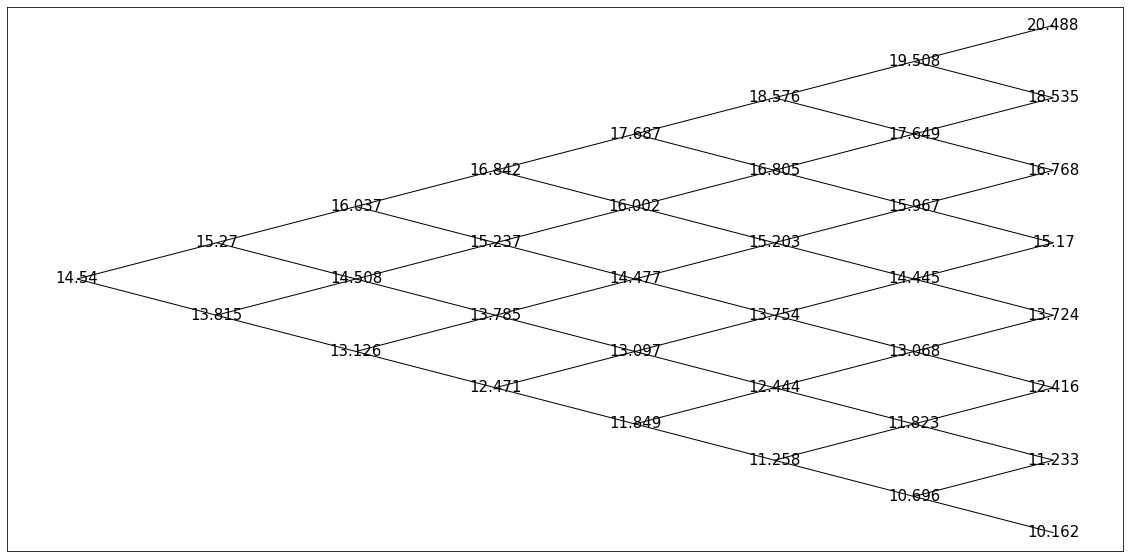

In [1]:
%matplotlib inline
import networkx as nx 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline 

N=7; # Input time length
S0=14.54; # Input S0 price
sigma=0.5110; # Adjust this to match value of option to current value (E.g. $0.40 at t=0)
dt=3.5/365; # Input timestep duration

r = 0.0168*dt; # Input

a=(1+r)*(1-sigma*np.sqrt(dt))-1;
b=(1+r)*(1+sigma*np.sqrt(dt))-1;

p = (r-a)/(b-a)
q = (b-r)/(b-a)

def plot_tree(g):
    plt.figure(figsize=(20,10))
    pos={}
    lab={}    
    for n in g.nodes():
        pos[n]=(n[0],n[1])
        lab[n]=float("{0:.3f}".format(g.node[n]['value']))
    elarge=g.edges(data=True)
    nx.draw_networkx_edges(g,pos,edgelist=elarge)
    nx.draw_networkx_labels(g,pos,lab,font_size=15,font_family='sans-serif')
    plt.ylim(-N+0.5,N+1.5) 
    plt.xlim(-0.5,N+0.5)
    plt.show()
    
def graph_stock():
    S=nx.Graph()
    for k in range(0,N):
        for l in range(-k+1,k+3,2):
            S.add_edge((k,l),(k+1,l+1))
            S.add_edge((k,l),(k+1,l-1))
            
    for n in S.nodes():
        k=n[0]
        l=n[1]-1
        S.node[n]['value']=S0*((1.0+b)**((k+l)/2))*((1.0+a)**((k-l)/2))
    return S

plot_tree(graph_stock())

In [2]:
def European_call_price(K):

    price = nx.Graph()    
    hedge = nx.Graph()
    S = graph_stock()

    for k in range(0,N):
            for l in range(-k+1,k+3,2):
                price.add_edge((k,l),(k+1,l+1))
                price.add_edge((k,l),(k+1,l-1))
                hedge.add_edge((k,l),(k+1,l+1))
                hedge.add_edge((k,l),(k+1,l-1))
    
    for l in range(-N+1,N+3,2):
        price.node[(N,l)]['value'] = np.maximum(S.node[(N,l)]['value']-K,0)
     
    for k in reversed(range(0,N)):
        for l in range(-k+1,k+3,2):
            price.node[(k,l)]['value'] = (price.node[(k+1,l+1)]['value']*p+price.node[(k+1,l-1)]['value']*q)/(1+r)        
    return price

In [3]:
def European_call_hedge(K):

    price = European_call_price(K)
    hedge = nx.Graph()
    S = graph_stock()

    for k in range(0,N):
            for l in range(-k+1,k+3,2):
                hedge.add_edge((k,l),(k+1,l+1))
                hedge.add_edge((k,l),(k+1,l-1))
    
    for l in range(-N+1,N+3,2):
        hedge.node[(N,l)]['value'] = 0

    for k in reversed(range(0,N)):
        for l in range(-k+1,k+3,2):
            hedge.node[(k,l)]['value'] = (price.node[(k+1,l+1)]['value']-price.node[(k+1,l-1)]['value'])/(b-a)/(S.node[(k,l)]['value'])
    return hedge

Strike K= 15.8


Underlying asset prices:


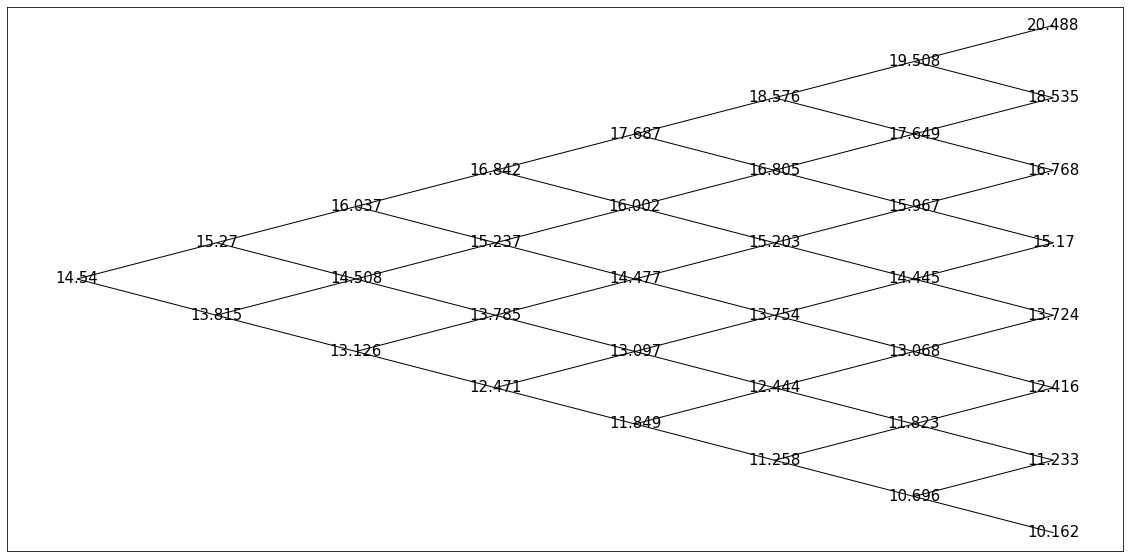

European call prices:


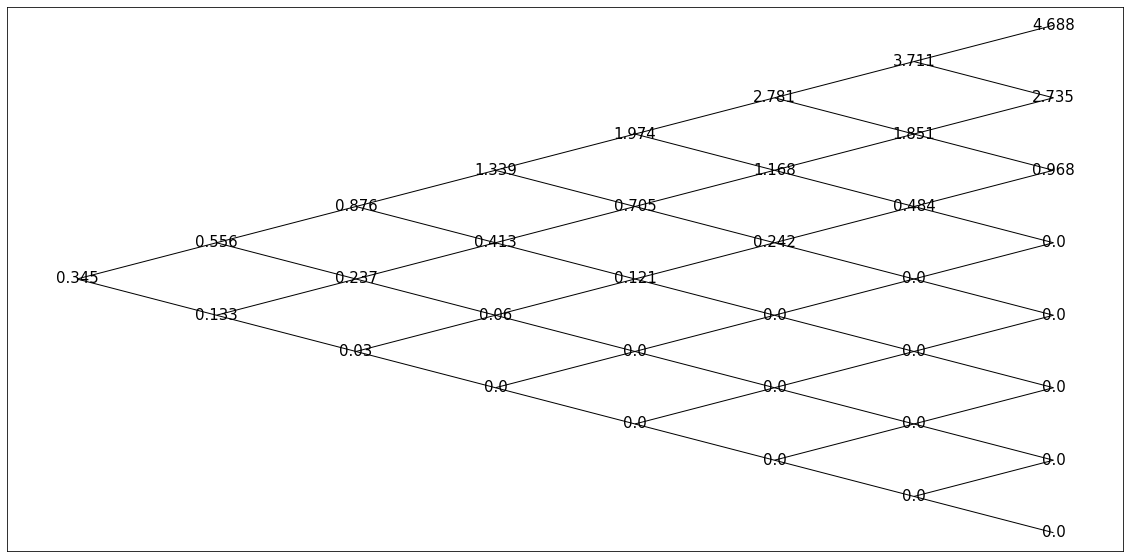

Price at time 0 of the European call option: 0.3447
Hedging strategy:


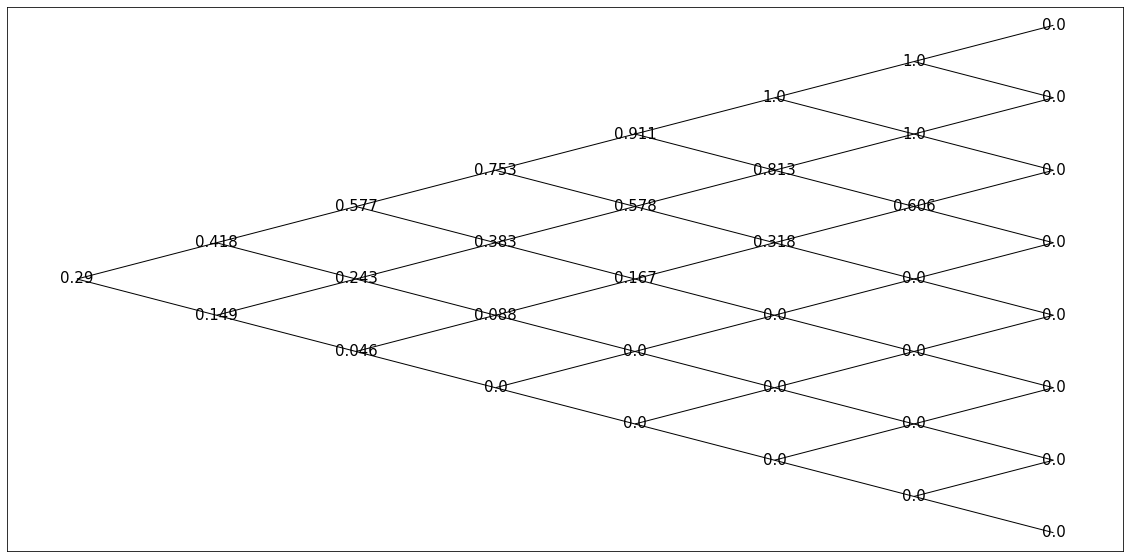

In [5]:
K = input("Strike K=")

call_price = European_call_price(float(K))

print('Underlying asset prices:')
plot_tree(graph_stock())
print('European call prices:')
plot_tree(European_call_price(float(K)))
print('Price at time 0 of the European call option:',float("{0:.4f}".format(call_price.node[(0,1)]['value'])))
print('Hedging strategy:')
plot_tree(European_call_hedge(float(K)))